In [2]:
import numpy as np
from data.mnist import mnist_data
from data.utils import sample_and_categorize
from model.utils import clone_encoder

In [3]:
# 1. data
train_images, train_labels, test_images, test_labels = mnist_data()
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=3000)

In [3]:
print(samples.shape)
print(sample_labels.shape)

(3000, 28, 28, 1)
(3000,)


In [4]:
x_train = np.reshape(samples, (-1, 784))
x_train_samples = np.reshape(samples, (-1, 784))


print(x_train.shape)
print(x_train_samples.shape)

(3000, 784)
(3000, 784)


In [5]:
model_pre = VAE(latent_dim=12)

dummy_eps_input = np.zeros((len(x_train), model_pre.latent_dim))

# Fit the model. Note that the 'eps' input is ignored because it is an Input tensor.
history = model_pre.model.fit([x_train, dummy_eps_input], x_train, shuffle=True, epochs=50, batch_size=100)
# plot_learning_curve(history)

classifier = model_pre.classifier()
encodings_pretrain = model_pre.encoder.predict(x_train_samples)
image_encoder = clone_encoder(model_pre.image_encoder())

2024-02-16 12:28:09.753077: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 12:28:09.761665: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 12:28:09.762105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-02-16 12:28:09.762974: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Epoch 1/50
30/30 [==============================] - 1s 2ms/step - loss: 275.0648
Epoch 2/50
30/30 [==============================] - 0s 2ms/step - loss: 190.6491
Epoch 3/50
30/30 [==============================] - 0s 2ms/step - loss: 164.0981
Epoch 4/50
30/30 [==============================] - 0s 2ms/step - loss: 149.6693
Epoch 5/50
30/30 [==============================] - 0s 2ms/step - loss: 140.2762
Epoch 6/50
30/30 [==============================] - 0s 2ms/step - loss: 133.9494
Epoch 7/50
30/30 [==============================] - 0s 2ms/step - loss: 128.8285
Epoch 8/50
30/30 [==============================] - 0s 2ms/step - loss: 125.3714
Epoch 9/50
30/30 [==============================] - 0s 2ms/step - loss: 122.1606
Epoch 10/50
30/30 [==============================] - 0s 2ms/step - loss: 119.4323
Epoch 11/50
30/30 [==============================] - 0s 2ms/step - loss: 117.1879
Epoch 12/50
30/30 [==============================] - 0s 2ms/step - loss: 115.2384
Epoch 13/50
30/30 [======

In [6]:
encodings_samples = model_pre.encoder.predict(x_train_samples)

/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/congyu/anaconda3/envs/congyuAI/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


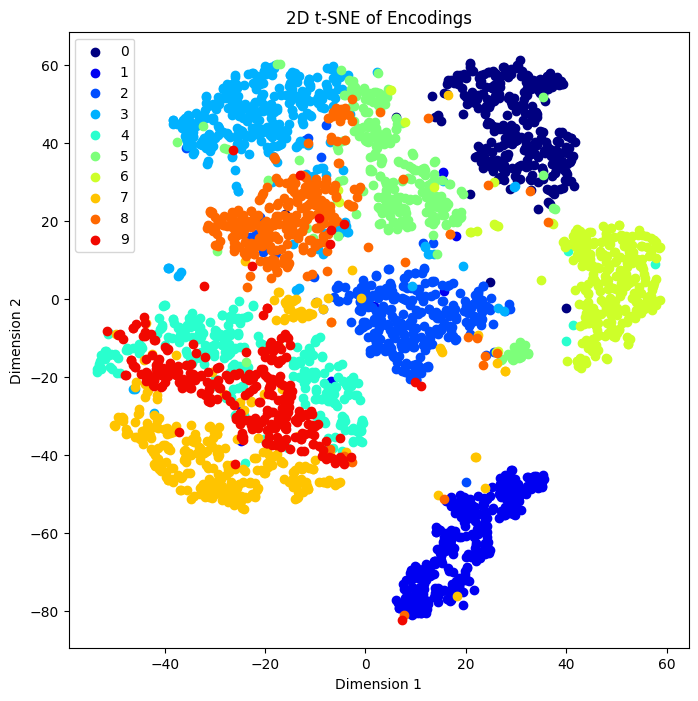

In [7]:
tsne = TSNE(n_components=2, random_state=42)
encodings_samples_2d = tsne.fit_transform(encodings_samples)
plot_encodings2d_with_labels(encodings_samples_2d, sample_labels)

In [8]:
cnn = load_model("trained_models/classifier.h5")

In [9]:
xai = xai_model(model_pre.decoder, cnn, input_shape=(12,))

# linear interpolation

In [10]:
from data.utils import value_analysis

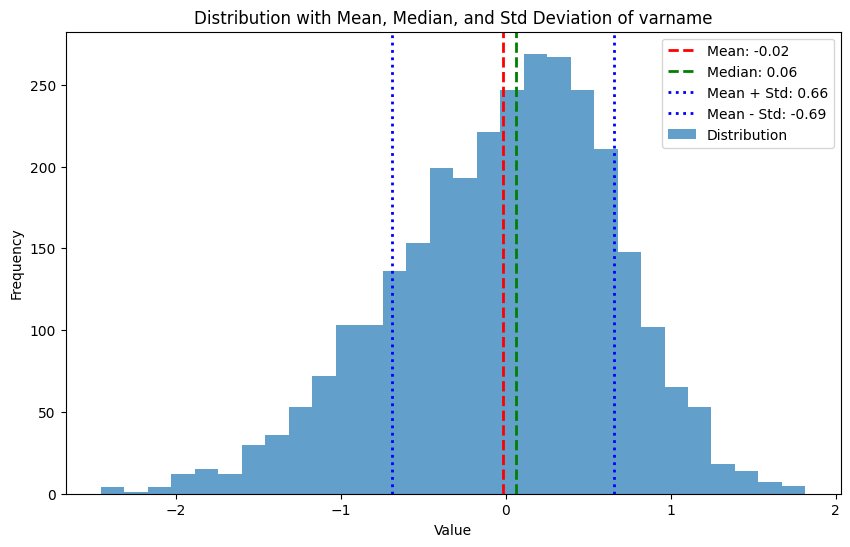

In [11]:
value_analysis(encodings_samples[:, 0])

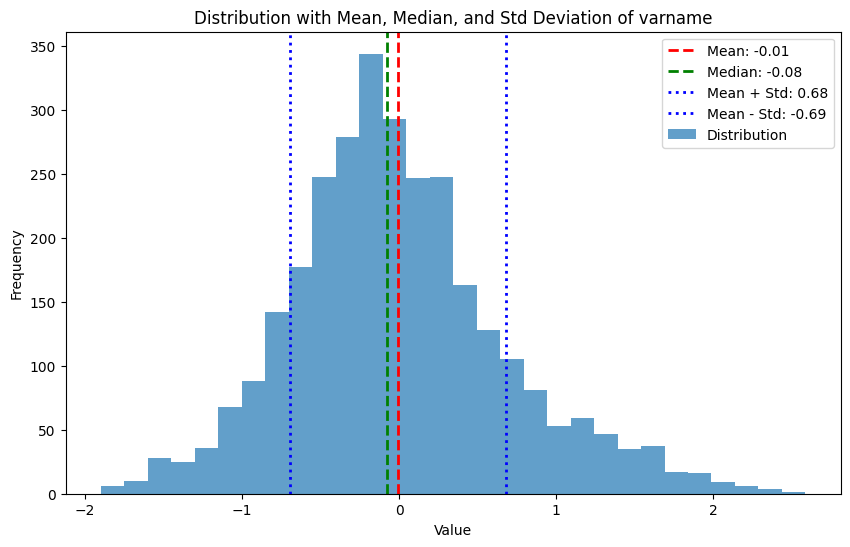

In [12]:
value_analysis(encodings_samples[:, 1])

In [31]:
# Define the mesh grid parameters again correctly
x_start, x_end = -2, 2
y_start, y_end = -2, 2
mesh_size_x, mesh_size_y = 10, 10
num_total_dimensions = 12

# Generate mesh grid for the first two dimensions
x_values = np.linspace(x_start, x_end, mesh_size_x)
y_values = np.linspace(y_start, y_end, mesh_size_y)
xx, yy = np.meshgrid(x_values, y_values, indexing='ij')

# Initialize a numpy array for the entire dataset with zeros
mesh_data_reshaped = np.zeros((mesh_size_x, mesh_size_y, num_total_dimensions))

# Fill the first two dimensions with the mesh grid values
mesh_data_reshaped[..., 0] = xx
mesh_data_reshaped[..., 1] = yy

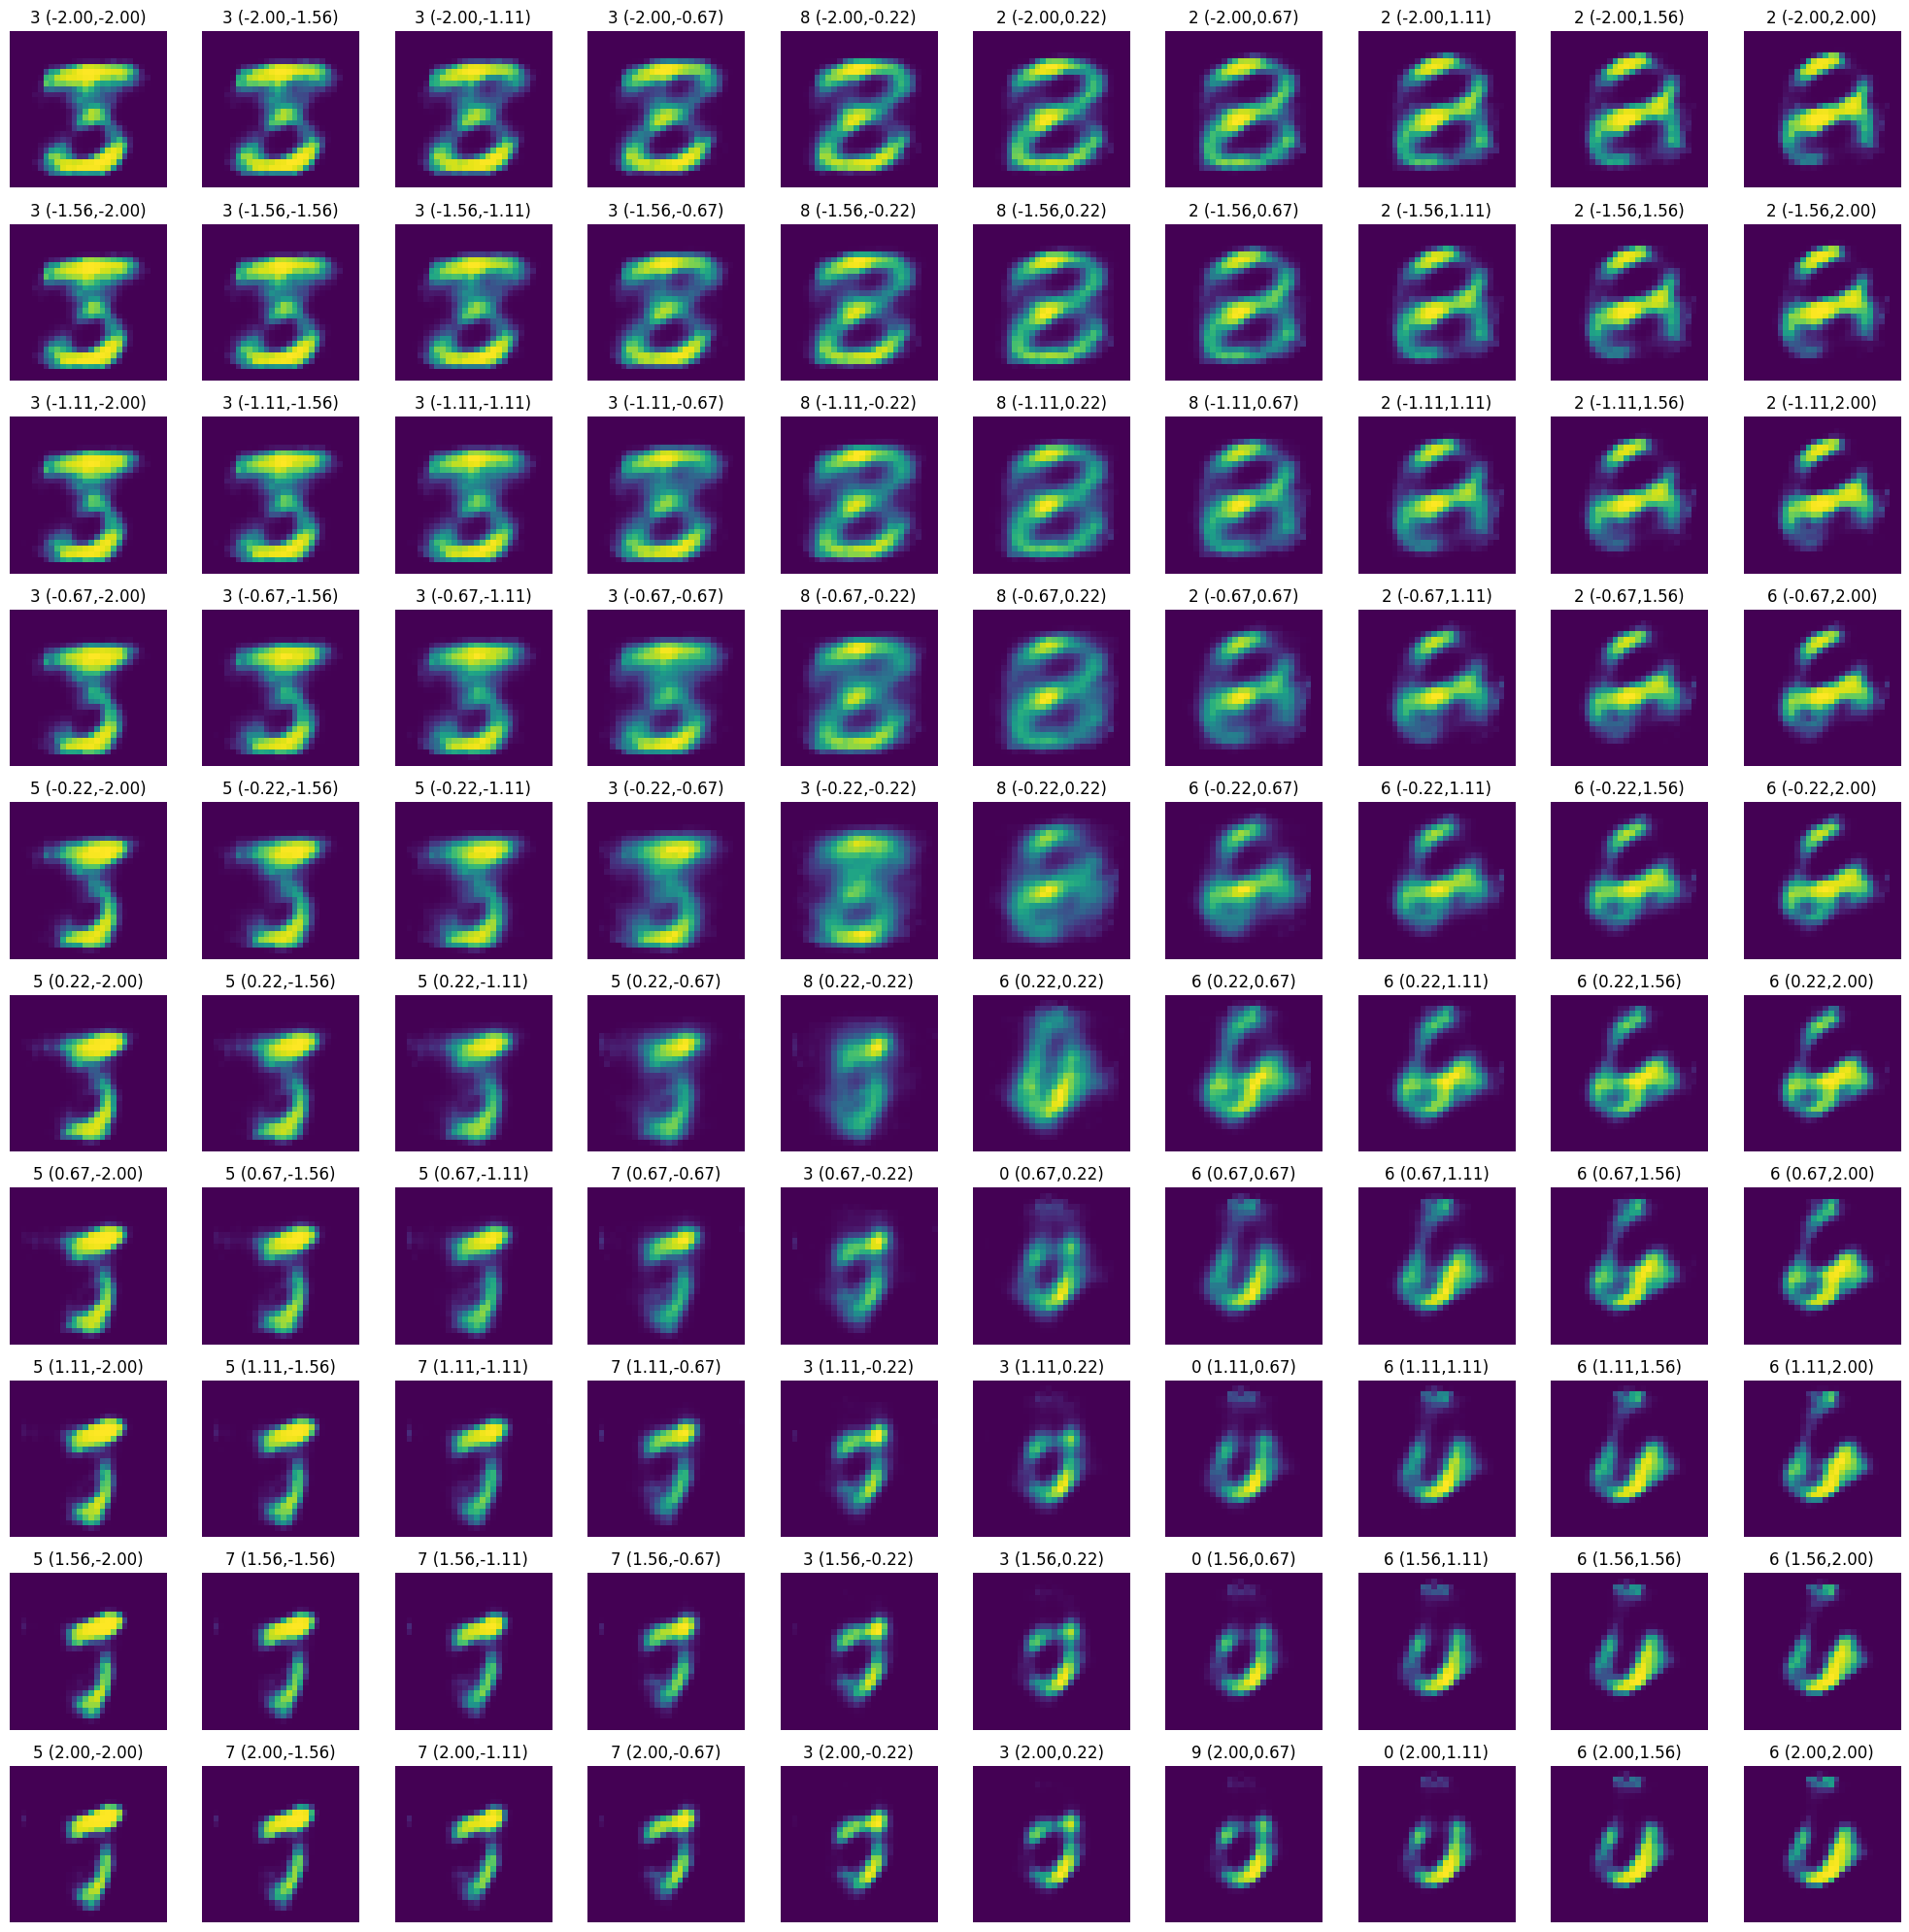

{0, 2, 3, 5, 6, 7, 8, 9}


In [40]:
# Plot setup
fig, axs = plt.subplots(10, 10, figsize=(20, 20))

labels_pred = []
for i in range(10):
    for j in range(10):
        # Decode each point to a 2D matrix
        z = np.reshape(mesh_data_reshaped[i, j, :], (1, 12))
        matrix_data = model_pre.decoder(z)
        img = np.reshape(matrix_data[0], (28, 28))
        label = np.argmax(xai(z)[0])
        labels_pred.append(label)
        
        
        # Plot the matrix
        axs[i, j].imshow(img)
        axs[i, j].axis('off')  # Hide the axis
        axs[i, j].set_title("{} ({:.2f},{:.2f})".format(label, z[0, 0], z[0, 1]))
        
plt.tight_layout()
plt.show()

print(set(labels_pred))